In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load in the labels
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/EVO/rif_embeddings_v1/12259_rif_labels.csv')

In [4]:
#subselect from labels
labels_subselect = labels[labels['UNIQUEID'].str.contains('site.02')]

In [5]:
labels_subselect['phenotype'] = labels['RIF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})

<ipython-input-5-273df59661be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels_subselect['phenotype'] = labels['RIF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})


In [6]:
labels_subselect

,Unnamed: 0,UNIQUEID,RIF_BINARY_PHENOTYPE,phenotype
0,0,site.02.subj.0001.lab.2014222001.iso.1,S,1.0
1,1,site.02.subj.0002.lab.2014222005.iso.1,S,1.0
2,2,site.02.subj.0004.lab.2014222010.iso.1,S,1.0
3,3,site.02.subj.0005.lab.2014222011.iso.1,S,1.0
4,4,site.02.subj.0006.lab.2014222013.iso.1,S,1.0
...,...,...,...,...
1069,1069,site.02.subj.1194.lab.2015291022.iso.1,R,0.0
1070,1070,site.02.subj.1195.lab.2015291024.iso.1,S,1.0
1071,1071,site.02.subj.1196.lab.2015291027.iso.1,S,1.0
1072,1072,site.02.subj.1197.lab.2016291004.iso.1,S,1.0


In [7]:
y = np.array(labels_subselect['phenotype'])

In [9]:
def load_and_concatenate_npy_files(npy_files):
    arrays = np.load(npy_files, allow_pickle=True)
    #print(arrays)
    if arrays.size == 0 or arrays.size == 1:
      return None
    concatenated_array = np.squeeze(arrays)
    #print(concatenated_array.shape)
    return concatenated_array[-1,:]

In [10]:
import os
import fnmatch
import numpy as np

def find_npy_files(base_dir, pattern):
    npy_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if fnmatch.fnmatch(file, pattern):
                npy_files.append(os.path.join(root, file))
    #print(npy_files)
    return npy_files[0]



# Example usage
files_list = labels['UNIQUEID'].tolist()

In [ ]:
#np.load('/content/drive/MyDrive/BioE212/EVO/rif_embeddings_v1/embeds_1.0_singles/site_02/site.02.subj.1120.lab.2014185039.iso.1.npy')

In [ ]:
'''
import csv
npy_files = []
with open("/content/drive/MyDrive/npy_files_final2.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(npy_files)
'''

In [ ]:
#np.load('/content/drive/MyDrive/BioE212/EVO/rif_embeddings_v1/embeds_1.0_singles/site_02/site.02.subj.0001.lab.2014222001.iso.1.npy')

array([[ 0.2265625 ,  0.14355469,  0.02075195, ..., -0.16699219,
         0.18261719, -0.25195312],
       [ 0.2109375 ,  0.12109375,  0.00114441, ..., -0.17089844,
         0.14746094, -0.25195312],
       [ 0.17773438,  0.0859375 ,  0.06225586, ..., -0.11279297,
         0.16796875, -0.20117188],
       ...,
       [ 0.07910156, -0.00164032,  0.828125  , ...,  0.55859375,
         0.13671875,  0.5       ],
       [ 0.35546875,  0.24902344, -0.66796875, ..., -0.78515625,
         0.34765625, -0.84765625],
       [ 0.828125  ,  0.65234375, -0.66796875, ..., -1.046875  ,
        -0.47070312, -1.0234375 ]])

In [12]:
import csv

# Define the path to the CSV file
file_path = '/content/drive/MyDrive/npy_files_final.csv'

# Initialize an empty list to hold the CSV data
csv_data = []

# Open and read the CSV file
with open(file_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        # Append the entire row (which is a list of values) to csv_data
        csv_data.extend(row)

# Print the CSV data as a single list
#print(csv_data)


In [15]:
site02csv = csv_data[:1074]

In [16]:
len(site02csv)

1074

In [17]:
import tensorflow as tf
'''
# Define a function to load and concatenate arrays in batches
def load_and_concatenate_batches(npy_files, batch_size):
    concatenated_batches = []
    for start_index in range(0, len(npy_files), batch_size):
        batch_files = npy_files[start_index:start_index+batch_size]
        #batch = tf.concat([load_and_concatenate_npy_files(npy_file) for npy_file in batch_files], axis=0)
        batch_list = []
        for npy_file in batch_files:
          #print(npy_file)
          array = load_and_concatenate_npy_files(npy_file)
          #print(array.shape)
          if array is not None:
            batch_list.append(np.squeeze(array))
          else:
            print(npy_file)
        batch = np.stack(batch_list, axis=0)
        batch = np.squeeze(batch)
        np.save(str('/content/drive/MyDrive/rif_embeddings_0526' + str(start_index) + "_arrayfinal3.npy"), batch)
        concatenated_batches.append(batch)
        print(start_index)
    concat_batch = np.vstack(concatenated_batches)
    #concat_array = concat_batch.numpy()

    return concat_batch

# Load and concatenate arrays in batches
batch_size = 100  # Adjust batch size based on available GPU memory
concatenated_array = load_and_concatenate_batches(csv_data, batch_size)
'''

'\n# Define a function to load and concatenate arrays in batches\ndef load_and_concatenate_batches(npy_files, batch_size):\n    concatenated_batches = []\n    for start_index in range(0, len(npy_files), batch_size):\n        batch_files = npy_files[start_index:start_index+batch_size]\n        #batch = tf.concat([load_and_concatenate_npy_files(npy_file) for npy_file in batch_files], axis=0)\n        batch_list = []\n        for npy_file in batch_files:\n          #print(npy_file)\n          array = load_and_concatenate_npy_files(npy_file)\n          #print(array.shape)\n          if array is not None:\n            batch_list.append(np.squeeze(array))\n          else:\n            print(npy_file)\n        batch = np.stack(batch_list, axis=0)\n        batch = np.squeeze(batch)\n        np.save(str(\'/content/drive/MyDrive/rif_embeddings_0526\' + str(start_index) + "_arrayfinal3.npy"), batch)\n        concatenated_batches.append(batch)\n        print(start_index)\n    concat_batch = np.vst

In [18]:
def load_and_concatenate_batches(batch_size, npy_files):
    concatenated_batches = []
    for start_index in range(0, len(npy_files), batch_size):

        batch = np.load(str('/content/drive/MyDrive/rif_embeddings_0526' + str(start_index) + "_arrayfinal3.npy"))
        concatenated_batches.append(batch)
        print(start_index)

    return np.vstack(concatenated_batches)

batch_size = 100  # Adjust batch size based on available GPU memory
concatenated_array = load_and_concatenate_batches(batch_size, csv_data)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200


In [ ]:
#np.save('/content/drive/MyDrive/rif_concatenatedarray_lastposition.npy', concatenated_array)

In [19]:
#concatenated_array.shape

In [20]:
site02concatarray = concatenated_array[:1074,:]

In [21]:
nan_indices = np.isnan(y)

In [22]:
y = y[~nan_indices]
site02concatarray = site02concatarray[~nan_indices]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(site02concatarray, y, test_size=0.2, random_state=42)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

In [25]:
# Train a logistic regression model
clf = LogisticRegression(multi_class='ovr')

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Print a few predictions vs actual labels
for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

Accuracy: 0.9248826291079812
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0
Predicted: 1.0, Actual: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_train

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
df_labels['RIF_BINARY_PHENOTYPE'][12001]

'S'

In [ ]:
import numpy as np
import os

def load_and_concatenate_npy_files(directory, axis=0):
    # List all .npy files in the specified directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

    # Load each file and store the arrays in a list
    arrays = [np.load(os.path.join(directory, file)) for file in npy_files]
    print(npy_files)

    # Concatenate the list of arrays along the specified axis
    concatenated_array = np.concatenate(arrays, axis=axis)

    return concatenated_array

# Example usage:
directory_path = '/content/drive/MyDrive/BioE212/test/embeds_1.1_small'
concatenated_array = load_and_concatenate_npy_files(directory_path)

#print(concatenated_array)


['embeds_0_to_999_index_0.npy', 'embeds_1000_to_1999_index_0.npy', 'embeds_2000_to_2999_index_0.npy', 'embeds_3000_to_3999_index_0.npy', 'embeds_4000_to_4999_index_0.npy', 'embeds_5000_to_5999_index_0.npy', 'embeds_6000_to_6999_index_0.npy', 'embeds_7000_to_7999_index_0.npy', 'embeds_8000_to_8999_index_0.npy', 'embeds_9000_to_9999_index_0.npy', 'embeds_10000_to_10999_index_0.npy', 'embeds_11000_to_11999_index_0.npy', 'embeds_12000_to_12258_index_0.npy']


In [ ]:
print(concatenated_array.shape)

(12259, 4096)


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')

Confusion Matrix:
[[ 50  13]
 [  3 147]]
Sensitivity (Recall): 0.98
Specificity: 0.7936507936507936


In [27]:
#PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

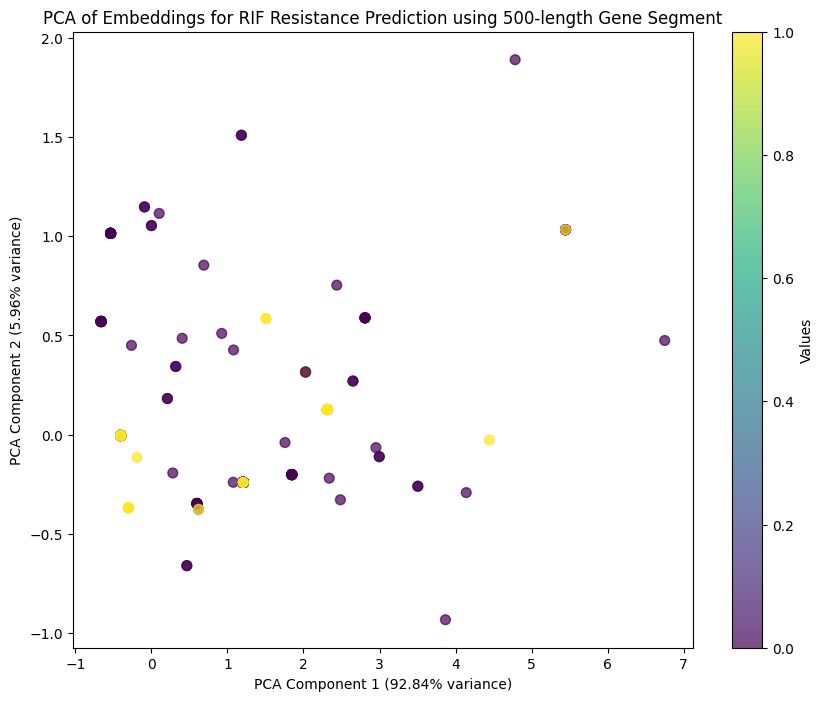

In [28]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(site02concatarray)

# Calculate the percent variation accounted for by each component
explained_variance = pca.explained_variance_ratio_ * 100

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Values')

plt.xlabel(f'PCA Component 1 ({explained_variance[0]:.2f}% variance)')
plt.ylabel(f'PCA Component 2 ({explained_variance[1]:.2f}% variance)')
plt.title('PCA of Embeddings for RIF Resistance Prediction using 500-length Gene Segment')
plt.show()

In [29]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.4 MB/s eta 0:00:00


In [30]:
import shap
sample_size = 20
shap_train = shap.sample(X_train, sample_size)
shap_test = shap.sample(X_test, sample_size)
explainer = shap.Explainer(clf, shap_train)
shap_values = explainer(shap_test)

In [31]:
result = {
        'model': clf,
        'X_test': X_test,
        'y_test': y_test,
        "explainer": explainer,
        'shap_values': shap_values,
        'shap_test': shap_test
     }
kernel = result

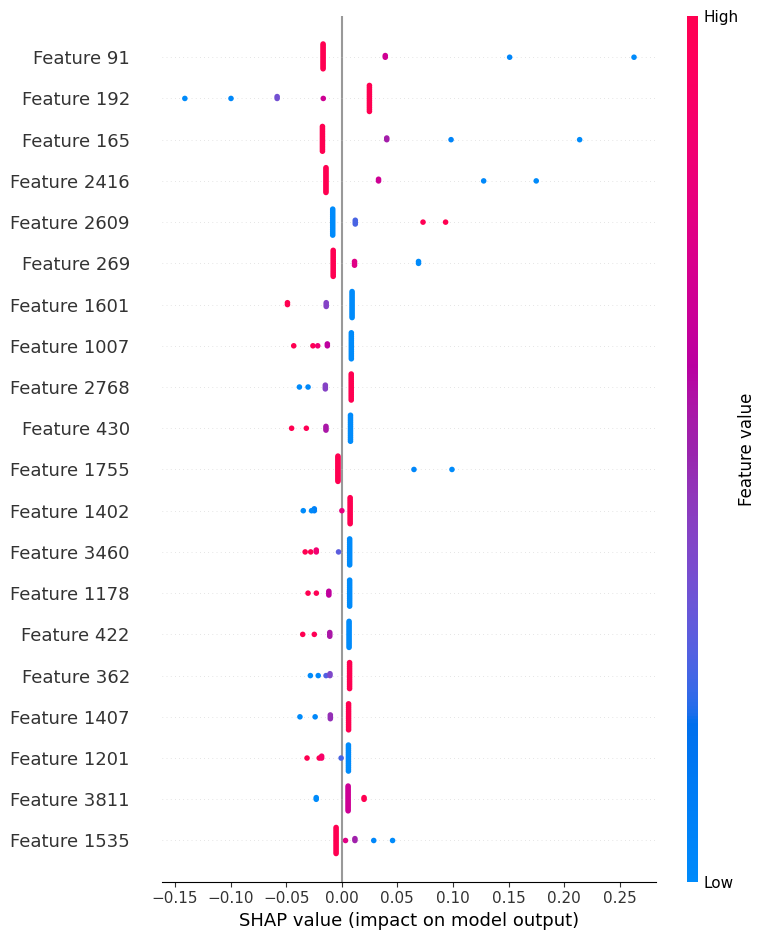

In [32]:
shap.summary_plot(shap_values, shap_test)


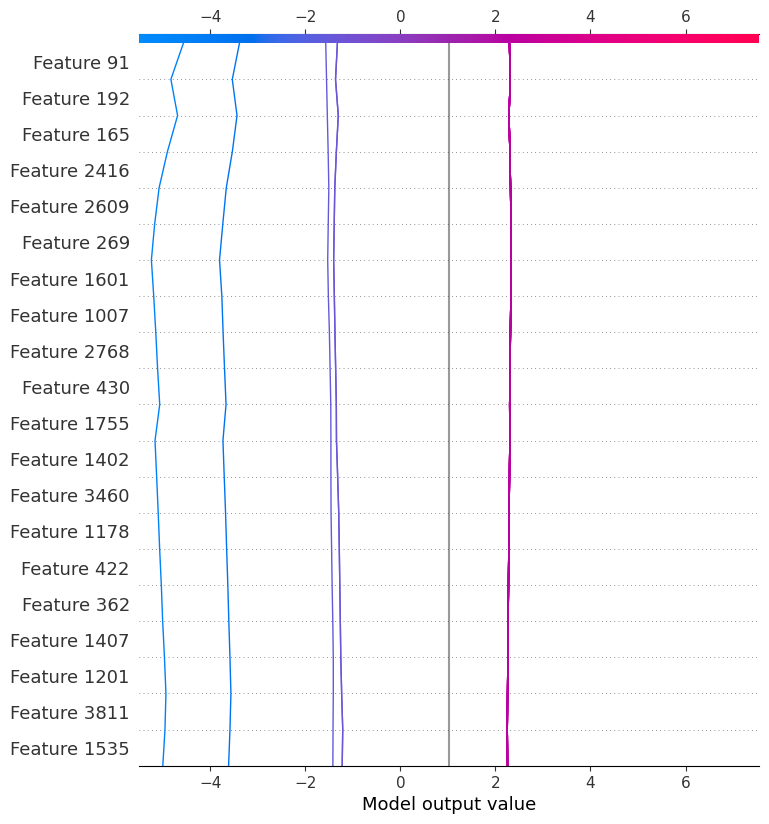

In [33]:
shap.decision_plot(explainer.expected_value, shap_values.values[:30])